## Vizualization MNIST DATASET / Segmenation Model
Chanyoung Ahn | [Github](https://github.com/cold-young)


In [1]:
your_model_name='parallel_DNN_model.pkl'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mnist_file import mnist_get_dataset, mnist_batch
from neural_network import (
    NN,
    neural_network_hypothesis
)
import pickle


In [10]:

def load_network(filename):
    with open(filename, 'rb') as f:
        network = pickle.load(f)
    return network

def calculate_accuracy(dataset: dict, network: NN):
    correct = 0

    for i in range(dataset["size"]):
        activations, _ = neural_network_hypothesis(dataset["images"][i], network)
        predict = np.argmax(activations)
        if predict == dataset["labels"][i]:
            correct += 1

    return correct / dataset["size"]

In [11]:
# Load Test dataset
data_sources = {
    "train_images": "data/train-images-idx3-ubyte",
    "train_labels": "data/train-labels-idx1-ubyte",
    "test_images": "data/t10k-images-idx3-ubyte",
    "test_labels": "data/t10k-labels-idx1-ubyte",
}
test_dataset = mnist_get_dataset(
    data_sources["test_images"], data_sources["test_labels"]
)


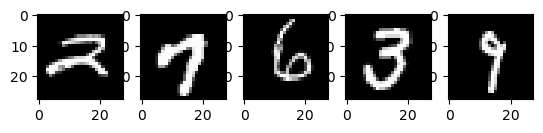

In [12]:
# Visualize Test dataset
num_examples = 5
seed = 147197952744
rng = np.random.default_rng(seed)

fig, axes = plt.subplots(1, num_examples)
for sample, ax in zip(rng.choice(test_dataset["images"], size=num_examples, replace=False), axes):
    ax.imshow(sample.reshape(28, 28), cmap='gray')

In [13]:
# Load your network model
network = load_network(your_model_name)

# Test accuarcy from test_dataset
accuracy = calculate_accuracy(test_dataset, network)
result = "Total Accuracy: {0:3.3f} %".format(accuracy*100)
print(result)

Total Accuracy: 70.730 %


Segmenation model: [8, 9, 1, 2, 6]


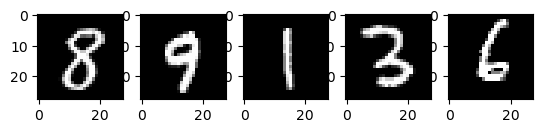

In [14]:
num_examples = 5
idx = np.array([i for i in range(test_dataset["size"])])
fig, axes = plt.subplots(1, num_examples)
labels = []
for sample, ax in zip(rng.choice(idx, size=num_examples, replace=False), axes):
    ax.imshow(test_dataset["images"][sample].reshape(28, 28), cmap='gray')


    activations,_ = neural_network_hypothesis(test_dataset["images"][sample], network)
    labels.append(np.argmax(activations))
    

print(f"Segmenation model: {labels}")
